<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK3/blob/main/UPASS_ML_WEEK6_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About this Dataset**
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information.

# Importing all the libraries needed

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK3/main/data_practice_week6.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

In [ ]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [ ]:
df.dtypes

,0
Age,int64
Sex,string[python]
ChestPainType,string[python]
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,string[python]
MaxHR,int64
ExerciseAngina,string[python]
Oldpeak,float64


So, as we can see here the object data has been converted to string

## Getting the categorical columns

In [ ]:
string_col=df.select_dtypes("string").columns.to_list()

In [ ]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("") # Write your code

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Exploratory Data Analysis

Out Come of this phase is as given below :

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

## Correlation Matrix
### Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.
- Lighter shades represents positive correlation
- Darker shades represents negative correlation

In [ ]:
px.imshow(df_final.corr(),title="Correlation Plot of the Diabetes Prediction")

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

In [ ]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df,
                 x="", # Write your code
                 color="", # Write your code
                 hover_data=df.columns,
                 title="Distribution of Diabetes",
                 barmode="group")
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="", # Write your code
                 color="",
                 hover_data=df.columns,
                 title="" # Write your code
                )
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="", # Write your code
                 hover_data=df.columns,
                 title="")
fig.show()

### Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

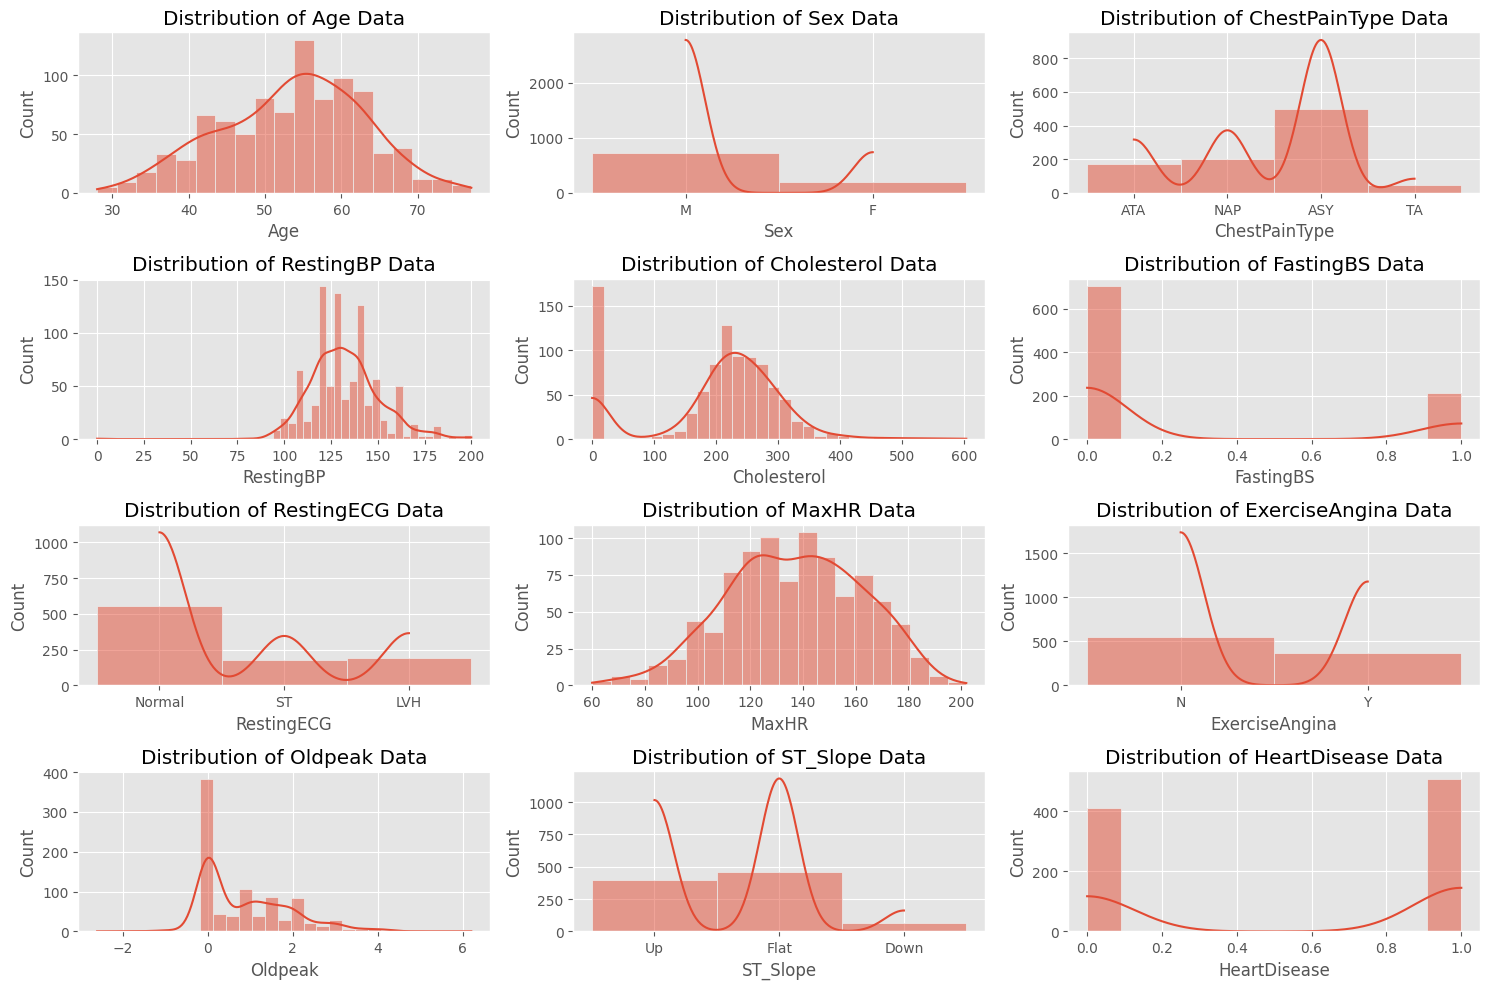

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()



# Outliers

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:
- Minimum
- First quartile
- Median
- Third quartile
- Maximum.

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

In [ ]:

fig = px.box(df,y="",x="",title=f"Distrubution of ") # Write your code
fig.show()

# Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that I will cover in this article are
1. Handling Null Values
2. Feature Scaling
3. Handling Categorical Variables

# 1. Handling Null Values :
In any real-world dataset, there are always few null values. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

> In python NULL is reprsented with NaN. So don’t get confused between these two,they can be used interchangably.


In [ ]:
# Checking for Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [ ]:
# Checking for NULLs in the data
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


# 2. Feature Scaling


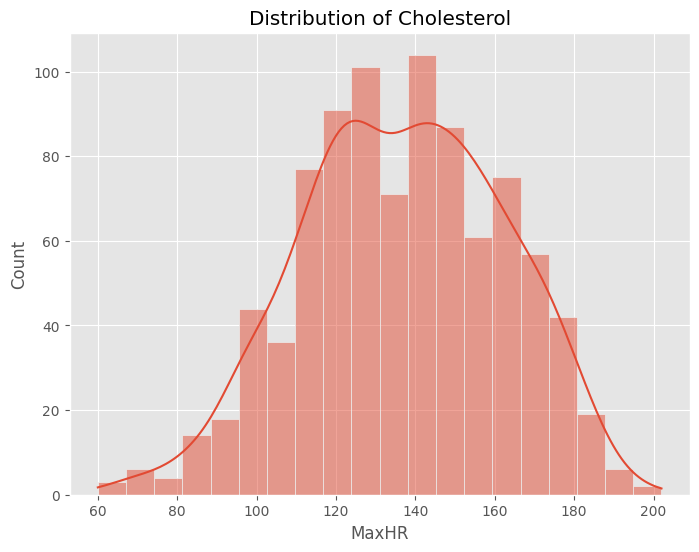

In [ ]:
# prompt: plot histogram feature RestingBP kde=True

plt.figure(figsize=(8, 6))
plt.title("Distribution of ") # Write your code
sns.histplot(df[''], kde=True) # Write your code
plt.show()


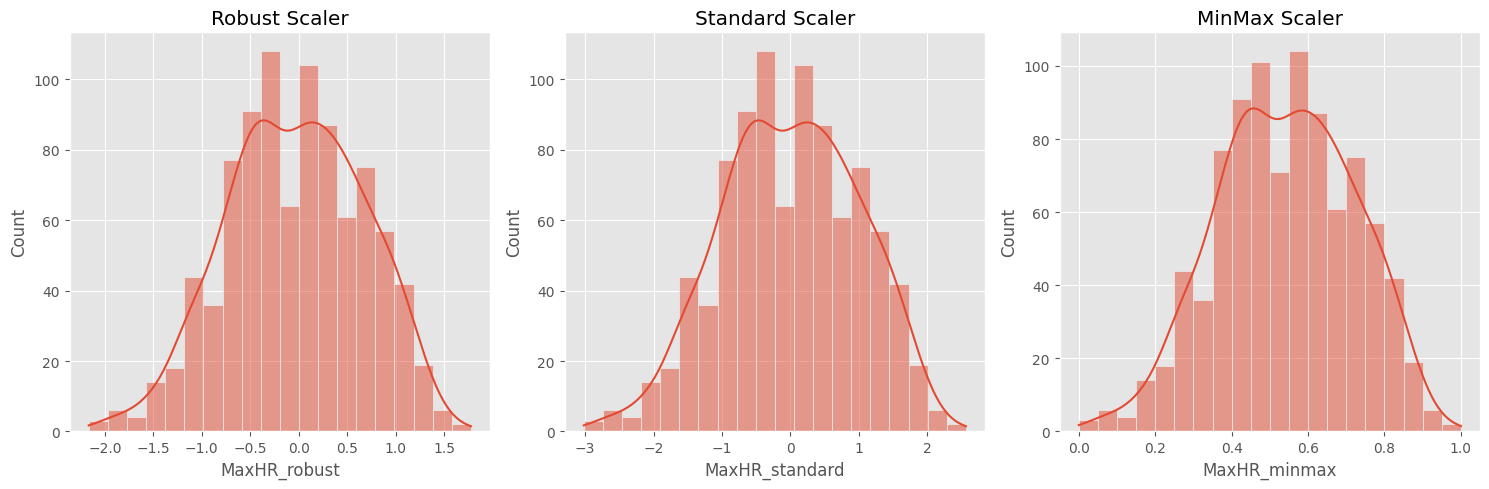

In [ ]:
# prompt: histogram plot of MaxHR using three different scaling RobustScaler, StandardScaler, MinMaxScaler

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Create scaler objects
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Scale the 'MaxHR' column using each scaler
df['MaxHR_robust'] = robust_scaler.fit_transform(df[['']]) # Write your code by selecting the feature
df['MaxHR_standard'] = standard_scaler.fit_transform(df[['']]) # Write your code by selecting the feature
df['MaxHR_minmax'] = minmax_scaler.fit_transform(df[['']]) # Write your code by selecting the feature

# Create histograms for each scaled version
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['MaxHR_robust'], kde=True, ax=axes[0])
axes[0].set_title('Robust Scaler')

sns.histplot(df['MaxHR_standard'], kde=True, ax=axes[1])
axes[1].set_title('Standard Scaler')

sns.histplot(df['MaxHR_minmax'], kde=True, ax=axes[2])
axes[2].set_title('MinMax Scaler')

plt.tight_layout()
plt.show()


# 3. Handling Categorical Variables

Categorical variables/features are any feature type can be classified into two major types:
- Nominal
- Ordinal

Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.Ordinal variables, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

It is a binary classification problem:
the target here is **not skewed** but we use the best metric for this binary classification problem which would be Area Under the ROC Curve (AUC). We can use precision and recall too, but AUC combines these two metrics. Thus, we will be using AUC to evaluate the model that we build on this dataset.

We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing that can be to use :
- Label Encoding
```python
from sklearn.preprocessing import LabelEncoder
```
- One Hot Encoding
```python
pd.get_dummies()
```

but we need to understand where to use which type of label encoding:

**For not Tree based Machine Learning Algorithms the best way to go will be to use One-Hot Encoding**
- The disadvantage is that the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction.

**For Tree based Machine Learning Algorithms the best way to go is with Label Encoding**

- LabelEncoder can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2].

In [ ]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [ ]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding
# which will be used with Tree Based Algorthms
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHR_robust,MaxHR_standard,MaxHR_minmax
0,12,1,1,41,147,0,1,98,0,10,2,0,98,98,98
1,21,0,2,55,40,0,1,82,0,20,1,1,82,82,82
2,9,1,1,31,141,0,2,25,0,10,2,0,25,25,25
3,20,0,0,39,72,0,1,34,1,25,1,1,34,34,34
4,26,1,2,49,53,0,1,48,0,10,2,0,48,48,48
